# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [0]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')



In [0]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [0]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [0]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.4 preprocessing of project_teacher_prefix

In [0]:
#Conveting it into list 
teacher_prefix_list = list(project_data['teacher_prefix'].values)

In [0]:
#https://www.daniweb.com/programming/software-development/threads/239037/how-do-i-remove-all-dots-from-a-txt-file

cat_list = []

for i in teacher_prefix_list:
    c=str(i).replace('.','')
    cat_list.append(c)
       

In [0]:
project_data['clean_teacher_prefix_list'] = cat_list

project_data['clean_teacher_prefix_list'].value_counts()

Mrs        57269
Ms         38955
Mr         10648
Teacher     2360
Dr            13
nan            3
Name: clean_teacher_prefix_list, dtype: int64

## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [0]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

      clean_categories                 clean_subcategories  \
55660     Math_Science  AppliedSciences Health_LifeScience   
76127     SpecialNeeds                        SpecialNeeds   

      clean_teacher_prefix_list  \
55660                       Mrs   
76127                        Ms   

                                                   essay  
55660  I have been fortunate enough to use the Fairy ...  
76127  Imagine being 8-9 years old. You're in your th...

In [0]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re
Sir aap muze apka ipython notebook 2nd assignment send kar sakte ho kya kyu ki muze kuch b nahi malum ho raha hai.
sagardj1432@gmail.com
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

In [0]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

In [0]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

In [0]:
# after preprocesing
preprocessed_essays[20000]

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [0]:
# similarly you can preprocess the titles also

## 1.5 Preparing data for models

In [0]:
project_data.columns

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [0]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

In [0]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

In [0]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

In [0]:
#One hot encoding school_state

vectorizer=CountVectorizer(lowercase=False,binary=True)
vectorizer.fit(project_data['school_state'].values)
school_state_one_hot=vectorizer.fit_transform(project_data['school_state'].values)
print(vectorizer.get_feature_names())
print('Shape of matrix after one hot encoding',school_state_one_hot.shape)

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [0]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

In [0]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

#### 1.5.2.2 TFIDF vectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [0]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

In [0]:
# Similarly you can vectorize for title also

### 1.5.3 Vectorizing Numerical features

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

In [0]:
price_standardized

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [0]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. K Nearest Neighbor</h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
  
    

In [0]:
#Considering 50K data points from project_data
project_data=project_data.head(50000)
print(project_data.shape)
project_data.head(1)

(50000, 19)


Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   

      clean_categories                 clean_subcategories  \
55660     Math_Science  AppliedSciences Health_LifeScience   

      clean_teacher_prefix_list  \
55660                       Mrs   

                                                   essay  
55660  I have been fortunate enough to use the Fairy ...

In [0]:
# 50K data points from resource_data
resource_data=resource_data.head(50000)
print(resource_data.shape)
resource_data.head(2)

(50000, 4)


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [0]:
project_data['project_is_approved'].value_counts()

1    41993
0     8007
Name: project_is_approved, dtype: int64

In [0]:
# storing quantity from resource_data in variable 
data_quantity=resource_data['quantity'].values


In [0]:
#Creating new column named quantity in project_data
project_data['quantity']=data_quantity

In [0]:
#storing price from resource_data in variable
data_price=resource_data['price'].values

In [0]:
#Creating new column named price in project_data
project_data['price']=data_price

In [0]:
#Print complete dataset after all these operations
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2   ...    \
55660  My students come from a variety of backgrounds...   ...     
76127  Most of my students have autism, anxiety, anot...   ...     

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

      teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                           53                    1   
76127                                            4                    1   

       clean_categories                 clean_subcategories  \
55660      Math_Science  AppliedSciences Health_LifeScience   
76127      SpecialNeeds                        SpecialNeeds   

      clean_teacher_prefix_list  \
55660                       Mrs   
76127                        Ms   

                                                   essay quantity   price  
55660  I have been fortunate enough to use the Fairy ...        1  149.00  
76127  Imagine being 8-9 years old. You're in your th...        3   14.95  

[2 rows x 21 columns]

### Splitting Project Resource Dataset

In [0]:
#storing target in data_y variable and features in data_x
data_y=project_data['project_is_approved']
project_data.drop(['project_is_approved'],axis=1,inplace=True)
data_x=project_data

In [0]:
# Print shape of features 
data_x.shape


(50000, 20)

In [0]:
#Print shape of target
data_y.shape

(50000,)

In [0]:
from sklearn.model_selection import train_test_split #SKlearn 

In [0]:
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.30,stratify=data_y)


In [0]:
print("Train")
print(x_train.shape,y_train.shape)
print("Test")
print(x_test.shape,y_test.shape)


Train
(35000, 20) (35000,)
Test
(15000, 20) (15000,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### Categorical Features

### one hot encoding the catogorical features: state

In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_state_ohe = vectorizer.transform(x_train['school_state'].values)
x_test_state_ohe = vectorizer.transform(x_test['school_state'].values)

print("After vectorizations")
print(x_train_state_ohe.shape, y_train.shape)
print(x_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(35000, 51) (35000,)
(15000, 51) (15000,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### one hot encoding the catogorical features: teacher_prefix

In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_teacher_prefix_list'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_teacher_ohe = vectorizer.transform(x_train['clean_teacher_prefix_list'].values)
x_test_teacher_ohe = vectorizer.transform(x_test['clean_teacher_prefix_list'].values)

print("After vectorizations")
print(x_train_teacher_ohe.shape, y_train.shape)
print(x_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(35000, 6) (35000,)
(15000, 6) (15000,)
['dr', 'mr', 'mrs', 'ms', 'nan', 'teacher']


### one hot encoding the catogorical features: project_grade_category


In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_grade_ohe = vectorizer.transform(x_train['project_grade_category'].values)
x_test_grade_ohe = vectorizer.transform(x_test['project_grade_category'].values)

print("After vectorizations")
print(x_train_grade_ohe.shape, y_train.shape)
print(x_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(35000, 3) (35000,)
(15000, 3) (15000,)
['12', 'grades', 'prek']


### one hot encoding the catogorical features: clean_categories

In [0]:
# we use count vectorizer to convert the values into one 

vectorizer.fit(x_train['clean_categories'].values)# fit has to happen only on train data

x_train_categories_ohe = vectorizer.transform(x_train['clean_categories'].values)
x_test_categories_ohe = vectorizer.transform(x_test['clean_categories'].values)

print("After vectorizations")
print(x_train_categories_ohe.shape, y_train.shape)
print(x_test_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)


After vectorizations
(35000, 9) (35000,)
(15000, 9) (15000,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


### one hot encoding the catogorical features: clean_subcategories

In [0]:
# we use count vectorizer to convert the values into one 

vectorizer.fit(x_train['clean_subcategories'].values)# fit has to happen only on train data

x_train_subcategories_ohe = vectorizer.transform(x_train['clean_subcategories'].values)
x_test_subcategories_ohe = vectorizer.transform(x_test['clean_subcategories'].values)

print("After vectorizations")
print(x_train_subcategories_ohe.shape, y_train.shape)
print(x_test_subcategories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)


After vectorizations
(35000, 30) (35000,)
(15000, 30) (15000,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


### Encoding Numerical (quantity)

In [0]:
from sklearn.preprocessing import Normalizer # SKlearn
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(x_train['quantity'].values.reshape(-1,1))

x_train_quantity_norm = normalizer.transform(x_train['quantity'].values.reshape(-1,1))
x_test_quantity_norm = normalizer.transform(x_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_quantity_norm.shape, y_train.shape)
print(x_test_quantity_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(35000, 1) (35000,)
(15000, 1) (15000,)


### Encoding Numerical (price)

In [0]:

normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(x_train['price'].values.reshape(-1,1))

x_train_price_norm = normalizer.transform(x_train['price'].values.reshape(-1,1))
x_test_price_norm = normalizer.transform(x_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_price_norm.shape, y_train.shape)
print(x_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(35000, 1) (35000,)
(15000, 1) (15000,)


### Encoding Numerical (teacher_number_of_previously_posted_projects)

In [0]:
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

x_train_teacher_project_norm = normalizer.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_test_teacher_project_norm = normalizer.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_price_norm.shape, y_train.shape)
print(x_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(35000, 1) (35000,)
(15000, 1) (15000,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.4 Appling KNN on different kind of featurization as mentioned in the instructions</h2>

<br>Apply KNN on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instructions

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 2.4.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>

In [0]:
# Please write all the code with proper documentation

### Encoding Essay (BOW)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,max_features=5000)
vectorizer.fit(x_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_essay_bow = vectorizer.transform(x_train['essay'].values)
x_test_essay_bow = vectorizer.transform(x_test['essay'].values)

print("After vectorizations")
print(x_train_essay_bow.shape, y_train.shape)
print(x_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(35000, 5000) (35000,)
(15000, 5000) (15000,)


### Encoding project_title (BOW)

In [0]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(x_train['project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_project_title_bow = vectorizer.transform(x_train['project_title'].values)
x_test_project_title_bow = vectorizer.transform(x_test['project_title'].values)

print("After vectorizations")
print(x_train_project_title_bow.shape, y_train.shape)
print(x_test_project_title_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(35000, 4162) (35000,)
(15000, 4162) (15000,)


### Concatinating all the features

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((x_train_essay_bow,x_train_project_title_bow,x_train_state_ohe,x_train_teacher_ohe,x_train_grade_ohe,x_train_categories_ohe,x_train_subcategories_ohe,x_train_quantity_norm,x_train_price_norm,x_train_teacher_project_norm)).tocsr()
X_te = hstack((x_test_essay_bow,x_test_project_title_bow,x_test_state_ohe,x_test_teacher_ohe,x_test_grade_ohe,x_test_categories_ohe,x_test_subcategories_ohe,x_test_quantity_norm,x_test_price_norm,x_test_teacher_project_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(35000, 9264) (35000,)
(15000, 9264) (15000,)


### Applying KNN

In [0]:
#Brute Force
from sklearn.neighbors import KNeighborsClassifier


## 1. Find the best hyper parameter which results in the maximum AUC value

### Find the best hyper paramter using k-fold cross validation (or) simple cross validation data

### 2. K-fold cross validation 

In [0]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/07_cross_validation.ipynb
#Importing library from sklearn
from sklearn.model_selection import cross_val_score


In [0]:
# this function returns odd number 
def oddnumber(num):
    if num%2!=0:
        return num

In [0]:
lis=range(1,31)
K_range=list(filter(oddnumber,lis))

In [0]:
#Searching optimal value of k in KNN

K_score=[] # creating list that stores average scores for each k value 

for k in K_range:
    neigh=KNeighborsClassifier(n_neighbors=k,algorithm='brute') # passing values of k in this classifier
    scores=cross_val_score(neigh,X_tr,y_train,cv=5,scoring='roc_auc') #storing the values of accuracy in scores list
    print(scores.mean())
    K_score.append(scores.mean()) # appending the mean score of each value of K

 

0.5150313055783455
0.5310229230304448
0.5413892020146398
0.5506791966871607
0.5540016712291393
0.555866258575595
0.5597816446721644
0.5632232932985897
0.5666881424820712
0.5666976715532491
0.5668568434587554
0.570403691210145
0.5714150776915188
0.5716787203853386
0.5733592965117682


In [0]:
#Printing the average value of score for each value of k
print(K_score)

[0.5150313055783455, 0.5310229230304448, 0.5413892020146398, 0.5506791966871607, 0.5540016712291393, 0.555866258575595, 0.5597816446721644, 0.5632232932985897, 0.5666881424820712, 0.5666976715532491, 0.5668568434587554, 0.570403691210145, 0.5714150776915188, 0.5716787203853386, 0.5733592965117682]


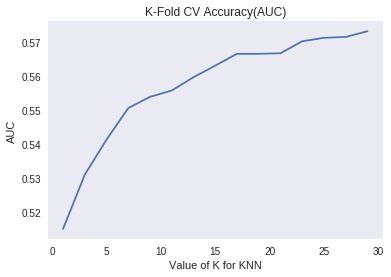

In [0]:
# Plot between different values of K and average score for each value of K 

%matplotlib inline

plt.plot(K_range,K_score)
plt.xlabel("Value of K for KNN")
plt.ylabel("AUC")
plt.title("K-Fold CV Accuracy(AUC)")
plt.grid()


### 3. GridSearchCV

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
neigh = KNeighborsClassifier(algorithm='brute')
parameters = {'n_neighbors':K_range}

In [0]:
grid_search = GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc',n_jobs=-1,verbose=2)
grid_search.fit(X_tr, y_train)
print("Done----------")

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 96.6min


Done----------


[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 192.6min finished


In [0]:
# examine the best model
print("Best Score=",grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

Best Score= 0.5833525760887989
{'n_neighbors': 29}
KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=29, p=2,
           weights='uniform')


### Representation of results

##### Plotting the performance of model both on train data and cross validation data for each hyper parameter:

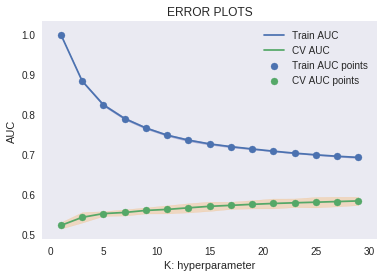

In [0]:
#Plotting using GridSearchCV

train_auc= grid_search.cv_results_['mean_train_score']
train_auc_std= grid_search.cv_results_['std_train_score']
cv_auc =grid_search.cv_results_['mean_test_score'] 
cv_auc_std= grid_search.cv_results_['std_test_score']

plt.plot(parameters['n_neighbors'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

#### After finding the best hyper parameter, we are training our model-M using the best hyper-param.And, finding the AUC on test data and plotting the ROC curve on both train and test using model-M. 

In [0]:
#here best hyper parameter is K(29)
best_k=29

In [0]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

### Finding the AUC on test data and plotting the ROC curve on both train and test using model-M

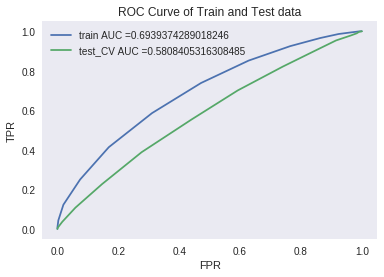

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k,algorithm='brute')
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

#y_train_pred = batch_predict(neigh, X_tr)    
#y_test_pred = batch_predict(neigh, X_te)

y_train_pred = neigh.predict_proba(X_tr)[:,1]
y_test_pred = neigh.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test_CV AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve of Train and Test data")
plt.grid()
plt.show()



### Confusion matrix with predicted and original labels of test data points 

In [0]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

#### Confusion matrix of Train data

the maximum value of tpr*(1-fpr) 0.4037465030357223 for threshold 0.828


Text(0.5, 24.0, 'Predicted label')

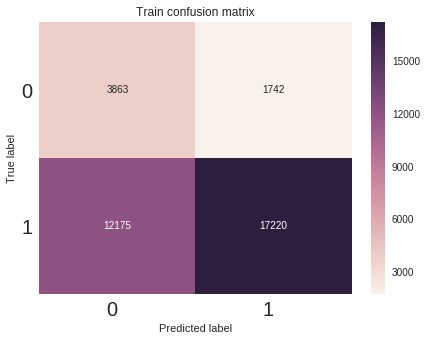

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(7,5))
cm_train=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
heatmap = sns.heatmap(cm_train, annot=True, fmt="d")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title("Train confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')


#### Confusion matrix of Test data

the maximum value of tpr*(1-fpr) 0.30962152643342805 for threshold 0.828


Text(0.5, 24.0, 'Predicted label')

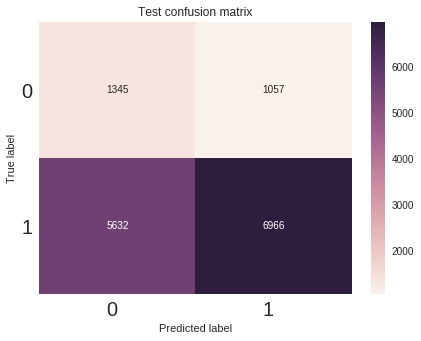

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

cm_test=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
fig = plt.figure(figsize=(7,5))
heatmap = sns.heatmap(cm_test, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title('Test confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

In [0]:
# Please write all the code with proper documentation

#### Encoding Essay (TFIDF)

In [0]:
tf_idf_vect=TfidfVectorizer(ngram_range=(1,2), min_df=10,max_features=5000)
tf_idf_vect.fit(x_train['essay'].values)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [0]:
x_train_tfidf_essay=tf_idf_vect.transform(x_train['essay'].values)
x_test_tfidf_essay=tf_idf_vect.transform(x_test['essay'].values)


In [0]:
print(x_train_tfidf_essay.shape,y_train.shape)
print(x_test_tfidf_essay.shape,y_test.shape)


(35000, 5000) (35000,)
(15000, 5000) (15000,)


### Encoding project_title (TFIDF)

In [0]:
tf_idf_vect=TfidfVectorizer(ngram_range=(1,2), min_df=10,max_features=5000)
tf_idf_vect.fit(x_train['project_title'].values)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [0]:
x_train_tfidf_project_title=tf_idf_vect.transform(x_train['project_title'].values)
x_test_tfidf_project_title=tf_idf_vect.transform(x_test['project_title'].values)


In [0]:
print(x_train_tfidf_project_title.shape,y_train.shape)
print(x_test_tfidf_project_title.shape,y_test.shape)


(35000, 3583) (35000,)
(15000, 3583) (15000,)


### Concatinating all the features

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((x_train_tfidf_essay,x_train_tfidf_project_title,x_train_state_ohe,x_train_teacher_ohe,x_train_grade_ohe,x_train_categories_ohe,x_train_subcategories_ohe,x_train_quantity_norm,x_train_price_norm,x_train_teacher_project_norm)).tocsr()
X_te = hstack((x_test_tfidf_essay,x_test_tfidf_project_title,x_test_state_ohe,x_test_teacher_ohe,x_test_grade_ohe,x_test_categories_ohe,x_test_subcategories_ohe,x_test_quantity_norm,x_test_price_norm,x_test_teacher_project_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)


set_2_X_tr=X_tr
set_2_X_te=X_te

#print(set_2_X_tr.shape,y_train.shape)
#print(set_2_X_te.shape,y_test.shape)
#print(set_2_X_cr.shape,y_cv.shape)


Final Data matrix
(35000, 8685) (35000,)
(15000, 8685) (15000,)


### Applying KNN

In [0]:
#Brute Force
from sklearn.neighbors import KNeighborsClassifier

In [0]:
neigh=KNeighborsClassifier(n_neighbors=5,algorithm='brute')

### 1. Find the best hyper parameter which results in the maximum AUC value

### Find the best hyper paramter using k-fold cross validation (or) simple cross validation data


### 2. K-fold cross validation


In [0]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/07_cross_validation.ipynb
#Importing library from sklearn
from sklearn.model_selection import cross_val_score


In [0]:
#Searching optimal value of k in KNN
K_score=[]
for k in K_range:
    neigh=KNeighborsClassifier(n_neighbors=k,algorithm='brute') # passing values of k in this classifier
    scores=cross_val_score(neigh,X_tr,y_train,cv=5,scoring='roc_auc') #storing the values of accuracy in scores list
    print(scores.mean())
    K_score.append(scores.mean()) # appending the mean score of each value of K
    

0.5093776985441917
0.523913022037191
0.5258785143571085
0.5238811724824095
0.5304346697956819
0.5335142137173408
0.535549808439874
0.5361705333503076
0.5366571987959987
0.5405744209078747
0.5399413749691025
0.5409911660351128
0.5432830138691989
0.5433357727553234
0.5462763409398487


In [0]:
#Printing the average value of score for each value of k
print(K_score)


[0.5093776985441917, 0.523913022037191, 0.5258785143571085, 0.5238811724824095, 0.5304346697956819, 0.5335142137173408, 0.535549808439874, 0.5361705333503076, 0.5366571987959987, 0.5405744209078747, 0.5399413749691025, 0.5409911660351128, 0.5432830138691989, 0.5433357727553234, 0.5462763409398487]


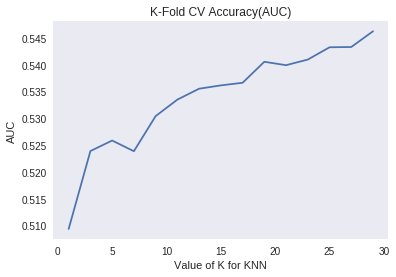

In [0]:
# Plot between different values of K and average score for each value of K 

%matplotlib inline

plt.plot(K_range,K_score)
plt.xlabel("Value of K for KNN")
plt.ylabel("AUC")
plt.title("K-Fold CV Accuracy(AUC)")
plt.grid()


#### Here we can see that the accuracy increases when the value of K increases the optimal value of K is 28.Where we are getting maximum value of accuracy.


### 3. GridSearchCV

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
neigh = KNeighborsClassifier(algorithm='brute')
parameters = {'n_neighbors':K_range}

In [0]:
grid_search = GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc',n_jobs=-1,verbose=10)
grid_search.fit(X_tr, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 68.1min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 89.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 118.7min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 148.4min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 182.6min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 218.0min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 240.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [0]:
from sklearn.externals import joblib
joblib.dump(grid_search,'grid_search_joblib_m_tfidf')

['grid_search_joblib_m_tfidf']

In [0]:
grid_search_joblib=joblib.load('grid_search_joblib_m_tfidf')

In [0]:
# examine the best model
print("Best Score=",grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

Best Score= 0.5409732610924534
{'n_neighbors': 29}
KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=29, p=2,
           weights='uniform')


### Representation of results


#### Plotting the performance of model both on train data and cross validation data for each hyper parameter:


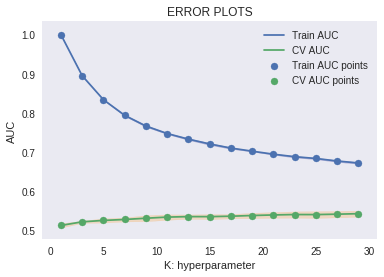

In [0]:
#Plotting using GridSearchCV

train_auc= grid_search.cv_results_['mean_train_score']
train_auc_std= grid_search.cv_results_['std_train_score']
cv_auc =grid_search.cv_results_['mean_test_score'] 
cv_auc_std= grid_search.cv_results_['std_test_score']

plt.plot(parameters['n_neighbors'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


#### After finding the best hyper parameter, we are training our model-M using the best hyper-param.And, finding the AUC on test data and plotting the ROC curve on both train and test using model-M.



In [0]:
#here best hyper parameter is K(29)
best_k=29

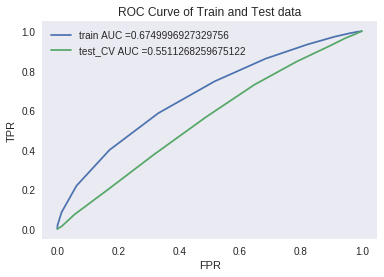

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

neigh = KNeighborsClassifier(n_neighbors=best_k,algorithm='brute')
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

#y_train_pred = batch_predict(neigh, X_tr)    
#y_test_pred = batch_predict(neigh, X_te)

y_train_pred = neigh.predict_proba(X_tr)[:,1]
y_test_pred = neigh.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test_CV AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve of Train and Test data")
plt.grid()
plt.show()


### Confusion matrix with predicted and original labels of test data points

#### Confusion matrix of Train data


the maximum value of tpr*(1-fpr) 0.3914541468833489 for threshold 0.862


Text(0.5, 24.0, 'Predicted label')

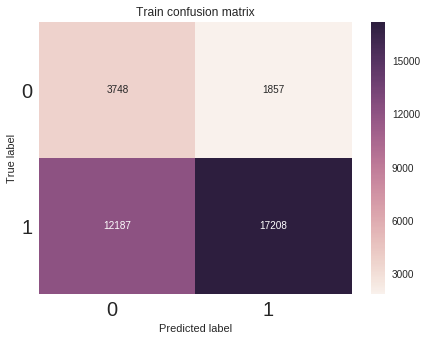

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

fig = plt.figure(figsize=(7,5))
cm_train=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
heatmap = sns.heatmap(cm_train, annot=True, fmt="d")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title("Train confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')


#### Confusion matrix of Test data

the maximum value of tpr*(1-fpr) 0.28965186047135666 for threshold 0.862


Text(0.5, 24.0, 'Predicted label')

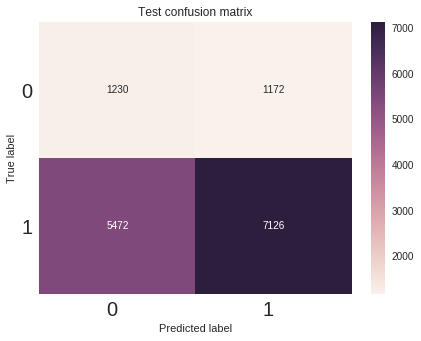

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

cm_test=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
fig = plt.figure(figsize=(7,5))
heatmap = sns.heatmap(cm_test, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title('Test confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')


### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

In [0]:
# Please write all the code with proper documentation

### Encoding project_title (AVG W2V)

In [0]:
#Avg W2V of X_train

In [0]:
# Train your own Word2Vec model using your own text corpus
list_of_sentance=[]
for sentance in x_train['project_title']:
    list_of_sentance.append(sentance.split())

In [0]:
w2v_model=Word2Vec(list_of_sentance,min_count=5,size=50, workers=4)

In [0]:
#Building Vocab using x_train['project_title']
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  3444
sample words  ['Flexible', 'Seating', 'for', '&', 'Workshop', 'iPads', 'Artists', 'Can', 'Enhance', 'Literacy', 'LEARNING', 'My', 'Eyes', 'Welcome', 'to', 'Active', 'the', 'Student!', 'Math', 'Made', 'Meaningful', 'We', 'have', 'Learning', 'With', 'Classroom', 'Supplies', 'Start', 'Year', 'of', 'Right!', 'MY', 'TO', 'SUCCESS', 'Putting', 'TECH', 'in', 'Firsties!', "Where's", '2nd', 'Grade', 'Here', 'I', 'Come!', 'Treasures', 'and', 'Why', 'Does', 'Sitting', 'Still']


In [0]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))



100%|██████████| 35000/35000 [00:04<00:00, 8407.64it/s]

35000
50


In [0]:
x_train_AVG_W2V_project_title=np.array(sent_vectors)

In [0]:
x_train_AVG_W2V_project_title.shape

(35000, 50)

In [0]:
#Avg W2V of x_test

In [0]:
# Train your own Word2Vec model using your own text corpus
list_of_sentance=[]
for sentance in x_test['project_title']:
    list_of_sentance.append(sentance.split())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|██████████| 15000/15000 [00:01<00:00, 8979.13it/s]

15000
50


In [0]:
x_test_AVG_W2V_project_title=np.array(sent_vectors)
x_test_AVG_W2V_project_title.shape

(15000, 50)

In [0]:
print(x_train_AVG_W2V_project_title.shape,y_train.shape)
print(x_test_AVG_W2V_project_title.shape,y_test.shape)

(35000, 50) (35000,)
(15000, 50) (15000,)


### Encoding essay (AVG W2V)

In [0]:
# Train your own Word2Vec model using your own text corpus
list_of_sentance=[]
for sentance in x_train['essay']:
    list_of_sentance.append(sentance.split())

In [0]:
w2v_model=Word2Vec(list_of_sentance,min_count=5,size=50, workers=4)

In [0]:
#Building Vocab using x_train['essay']
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  31958
sample words  ['First', 'grade', 'classrooms', 'are', 'the', 'and', 'by', 'far', 'funnest', 'Keeping', 'all', 'that', 'in', 'mind,', 'one', 'must', 'well', 'supplies', 'students', 'always', 'have', 'best', 'personalities.', 'Six', 'year', 'old', 'little', 'guys', 'want', 'to', 'please', 'make', 'you', 'smile.', 'As', 'a', 'result', 'they', 'tend', 'pick', 'up', 'on', 'your', 'own', 'personality', 'traits.', 'I', 'get', 'so', 'busy']


In [0]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))


100%|██████████| 35000/35000 [11:20<00:00, 51.43it/s]

35000
50


In [0]:
x_train_AVG_W2V_essay=np.array(sent_vectors)
x_train_AVG_W2V_essay.shape

(35000, 50)

In [0]:
#AVG_W2V x_test
list_of_sentance=[]
for sentance in x_test['essay']:
    list_of_sentance.append(sentance.split())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))


100%|██████████| 15000/15000 [04:44<00:00, 52.78it/s]

15000
50


In [0]:
x_test_AVG_W2V_essay=np.array(sent_vectors)
x_test_AVG_W2V_essay.shape

(15000, 50)

In [0]:
print(x_train_AVG_W2V_essay.shape,y_train.shape)
print(x_test_AVG_W2V_essay.shape,y_test.shape)

(35000, 50) (35000,)
(15000, 50) (15000,)


#### Concatinating all the features

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((x_train_AVG_W2V_essay,x_train_AVG_W2V_project_title,x_train_state_ohe,x_train_teacher_ohe,x_train_grade_ohe,x_train_categories_ohe,x_train_subcategories_ohe,x_train_quantity_norm,x_train_price_norm,x_train_teacher_project_norm)).tocsr()
X_te = hstack((x_test_AVG_W2V_essay,x_test_AVG_W2V_project_title,x_test_state_ohe,x_test_teacher_ohe,x_test_grade_ohe,x_test_categories_ohe,x_test_subcategories_ohe,x_test_quantity_norm,x_test_price_norm,x_test_teacher_project_norm)).tocsr()




print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(35000, 202) (35000,)
(15000, 202) (15000,)


### Applying KNN

In [0]:
#Brute Force
from sklearn.neighbors import KNeighborsClassifier

### 1. Find the best hyper parameter which results in the maximum AUC value

### Find the best hyper paramter using k-fold cross validation (or) simple cross validation data


### 2. K-fold cross validation


In [0]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/07_cross_validation.ipynb
#Importing library from sklearn
from sklearn.model_selection import cross_val_score

In [0]:
#Searching optimal value of k in KNN


K_score=[] # creating list that stores average scores for each k value 

for k in K_range:
    neigh=KNeighborsClassifier(n_neighbors=k,algorithm='brute') # passing values of k in this classifier
    scores=cross_val_score(neigh,X_tr,y_train,cv=5,scoring='roc_auc') #storing the values of accuracy in scores list
    print(scores.mean())
    K_score.append(scores.mean()) # appending the mean score of each value of K


0.5156372664979252
0.5299733747433182
0.5409028703899135
0.5467366041819572
0.546396804787114
0.5508370333088076
0.5523366481249352
0.5550350291994715
0.5576921833848505
0.5610869908604372
0.5626692870600828
0.56474242146748
0.5651164678585795
0.5663758984905071
0.5671930770387471


In [0]:
#Printing the average value of score for each value of k
print(K_score)


[0.5156372664979252, 0.5299733747433182, 0.5409028703899135, 0.5467366041819572, 0.546396804787114, 0.5508370333088076, 0.5523366481249352, 0.5550350291994715, 0.5576921833848505, 0.5610869908604372, 0.5626692870600828, 0.56474242146748, 0.5651164678585795, 0.5663758984905071, 0.5671930770387471]


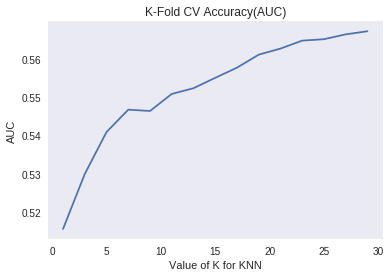

In [0]:
# Plot between different values of K and average score for each value of K 

%matplotlib inline

plt.plot(K_range,K_score)
plt.xlabel("Value of K for KNN")
plt.ylabel("AUC")
plt.title("K-Fold CV Accuracy(AUC)")
plt.grid()


#### Here we can see that the accuracy increases when the value of K increases the optimal value of K is 28.Where we are getting maximum value of accuracy.


### 3. GridSearchCV


In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
neigh = KNeighborsClassifier(algorithm='brute')
parameters = {'n_neighbors':K_range}

In [0]:
grid_search = GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc',n_jobs=-1,verbose=10)
grid_search.fit(X_tr, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 51.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 72.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 113.7min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 145.3min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 197.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 240.2min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 303.0min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 356.1min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 396.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [0]:
from sklearn.externals import joblib
joblib.dump(grid_search,'grid_search_joblib_m_avgw2v')

['grid_search_joblib_m_avgw2v']

In [0]:
# examine the best model
print("Best Score=",grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)


Best Score= 0.5714792016641278
{'n_neighbors': 29}
KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=29, p=2,
           weights='uniform')


### Representation of results


#### Plotting the performance of model both on train data and cross validation data for each hyper parameter:

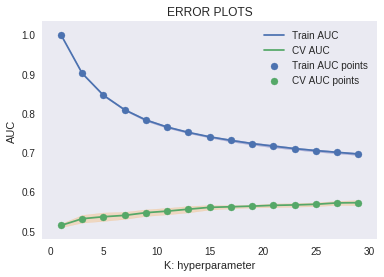

In [0]:
#Plotting using GridSearchCV

train_auc= grid_search.cv_results_['mean_train_score']
train_auc_std= grid_search.cv_results_['std_train_score']
cv_auc =grid_search.cv_results_['mean_test_score'] 
cv_auc_std= grid_search.cv_results_['std_test_score']

plt.plot(parameters['n_neighbors'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

#### After finding the best hyper parameter, we are training our model-M using the best hyper-param.And, finding the AUC on test data and plotting the ROC curve on both train and test using model-M.


In [0]:
#here best hyper parameter is K(29)
best_k=29

 ### Finding the AUC on test data and plotting the ROC curve on both train and test using model-M.

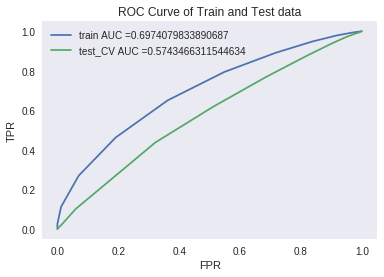

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

neigh = KNeighborsClassifier(n_neighbors=best_k,algorithm='brute')
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

#y_train_pred = batch_predict(neigh, X_tr)    
#y_test_pred = batch_predict(neigh, X_te)

y_train_pred = neigh.predict_proba(X_tr)[:,1]
y_test_pred = neigh.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test_CV AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve of Train and Test data")
plt.grid()
plt.show()




### Confusion matrix with predicted and original labels of test data points



#### Confusion matrix of Train data

the maximum value of tpr*(1-fpr) 0.41480760001086436 for threshold 0.862


Text(0.5, 24.0, 'Predicted label')

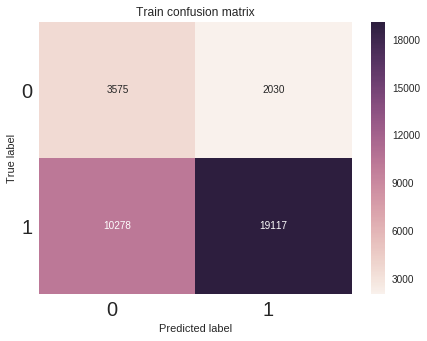

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

fig = plt.figure(figsize=(7,5))
cm_train=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
heatmap = sns.heatmap(cm_train, annot=True, fmt="d")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title("Train confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')


#### Confusion matrix of Test data


the maximum value of tpr*(1-fpr) 0.30164658122782 for threshold 0.862


Text(0.5, 24.0, 'Predicted label')

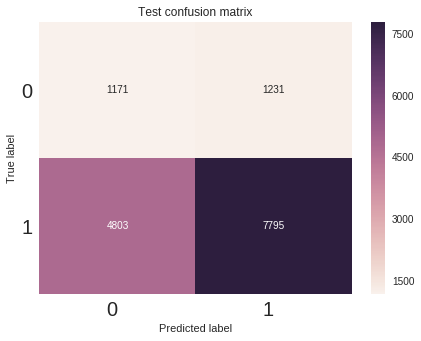

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

cm_test=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
fig = plt.figure(figsize=(7,5))
heatmap = sns.heatmap(cm_test, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title('Test confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 2.4.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

In [0]:
# Please write all the code with proper documentation

### Encoding project_title (TFIDF W2V)

In [0]:
# Train your own Word2Vec model using your own text corpus
list_of_sentance=[]
for sentance in x_train['project_title']:
    list_of_sentance.append(sentance.split())
    

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# TF-IDF weighted Word2Vec
tfidf_feat = tfidf_model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentance): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████| 35000/35000 [00:27<00:00, 1261.55it/s]


In [0]:
x_train_TFIDF_W2V_project_title=np.array(tfidf_sent_vectors)
print(x_train_TFIDF_W2V_project_title.shape,y_train.shape)

(35000, 50) (35000,)


In [0]:
list_of_sentance=[]
for sentance in x_test['project_title']:
    list_of_sentance.append(sentance.split())

In [0]:
# TF-IDF weighted Word2Vec
tfidf_feat = tfidf_model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentance): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████| 15000/15000 [00:11<00:00, 1265.36it/s]


In [0]:
x_test_TFIDF_W2V_project_title=np.array(tfidf_sent_vectors)
print(x_test_TFIDF_W2V_project_title.shape,y_test.shape)

(15000, 50) (15000,)


In [0]:
print(x_train_TFIDF_W2V_project_title.shape,y_train.shape)
print(x_test_TFIDF_W2V_project_title.shape,y_test.shape)


(35000, 50) (35000,)
(15000, 50) (15000,)


### Encoding essay(TFIDF W2V)

In [0]:
# Train your own Word2Vec model using your own text corpus
list_of_sentance=[]
for sentance in x_train['essay']:
    list_of_sentance.append(sentance.split())
    

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# TF-IDF weighted Word2Vec
tfidf_feat = tfidf_model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentance): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████| 35000/35000 [59:37<00:00,  8.83it/s]


In [0]:
x_train_TFIDF_W2V_essay=np.array(tfidf_sent_vectors)
print(x_train_TFIDF_W2V_essay.shape,y_train.shape)

(35000, 50) (35000,)


In [0]:
list_of_sentance=[]
for sentance in x_test['essay']:
    list_of_sentance.append(sentance.split())

In [0]:
# TF-IDF weighted Word2Vec
tfidf_feat = tfidf_model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentance): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████| 15000/15000 [28:01<00:00,  8.92it/s]


In [0]:
x_test_TFIDF_W2V_essay=np.array(tfidf_sent_vectors)
print(x_test_TFIDF_W2V_essay.shape,y_test.shape)

(15000, 50) (15000,)


In [0]:
print(x_train_TFIDF_W2V_essay.shape,y_train.shape)
print(x_test_TFIDF_W2V_essay.shape,y_test.shape)

(35000, 50) (35000,)
(15000, 50) (15000,)


### Concatinating all the features

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((x_train_TFIDF_W2V_essay,x_train_TFIDF_W2V_project_title,x_train_state_ohe,x_train_teacher_ohe,x_train_grade_ohe,x_train_categories_ohe,x_train_subcategories_ohe,x_train_quantity_norm,x_train_price_norm,x_train_teacher_project_norm)).tocsr()
X_te = hstack((x_test_TFIDF_W2V_essay,x_test_TFIDF_W2V_project_title,x_test_state_ohe,x_test_teacher_ohe,x_test_grade_ohe,x_test_categories_ohe,x_test_subcategories_ohe,x_test_quantity_norm,x_test_price_norm,x_test_teacher_project_norm)).tocsr()


In [0]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(35000, 202) (35000,)
(15000, 202) (15000,)


### Applying KNN

In [0]:
#Brute Force
from sklearn.neighbors import KNeighborsClassifier

### 1. Find the best hyper parameter which results in the maximum AUC value

### Find the best hyper paramter using k-fold cross validation (or) simple cross validation data

#### 2. K-fold cross validation

In [0]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/07_cross_validation.ipynb
#Importing library from sklearn
from sklearn.model_selection import cross_val_score


In [0]:
#Searching optimal value of k in KNN

K_score=[] # creating list that stores average scores for each k value 

for k in K_range:
    neigh=KNeighborsClassifier(n_neighbors=k,algorithm='brute') # passing values of k in this classifier
    scores=cross_val_score(neigh,X_tr,y_train,cv=5,scoring='roc_auc') #storing the values of accuracy in scores list
    print(scores.mean())
    K_score.append(scores.mean()) # appending the mean score of each value of K


0.5097749606660275
0.5164593461448762
0.5219251181915887
0.5243230300504116
0.5272174247260278
0.5284673414604576
0.5328740968435862
0.5322307934969854
0.5330027696518506
0.5343265973826312
0.5349646506358757
0.5376112439398218
0.5392742185971963
0.539839605095868
0.5418561871970858


In [0]:
#Printing the average value of score for each value of k
print(K_score)


[0.5097749606660275, 0.5164593461448762, 0.5219251181915887, 0.5243230300504116, 0.5272174247260278, 0.5284673414604576, 0.5328740968435862, 0.5322307934969854, 0.5330027696518506, 0.5343265973826312, 0.5349646506358757, 0.5376112439398218, 0.5392742185971963, 0.539839605095868, 0.5418561871970858]


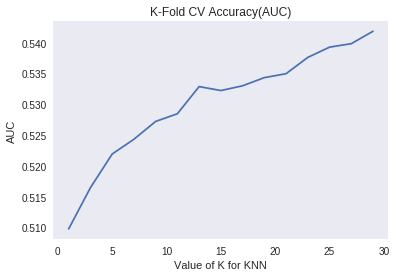

In [0]:
# Plot between different values of K and average score for each value of K 

%matplotlib inline

plt.plot(K_range,K_score)
plt.xlabel("Value of K for KNN")
plt.ylabel("AUC")
plt.title("K-Fold CV Accuracy(AUC)")
plt.grid()



#### Here we can see that the accuracy increases when the value of K increases the optimal value of K is 28.Where we are getting maximum value of accuracy.

### 3. GridSearchCV


In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
neigh = KNeighborsClassifier(algorithm='brute')
parameters = {'n_neighbors':K_range}

In [0]:

grid_search = GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc',n_jobs=-1,verbose=10)
grid_search.fit(X_tr, y_train)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 36.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 51.6min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 81.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 104.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 141.0min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 171.5min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 216.0min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 253.0min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 281.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [0]:
from sklearn.externals import joblib
joblib.dump(grid_search,'grid_search_joblib_m_tfidfw2v')

['grid_search_joblib_m_tfidfw2v']

In [0]:
# examine the best model
print("Best Score=",grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

Best Score= 0.541856187197086
{'n_neighbors': 29}
KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=29, p=2,
           weights='uniform')


### Representation of results


#### Plotting the performance of model both on train data and cross validation data for each hyper parameter:

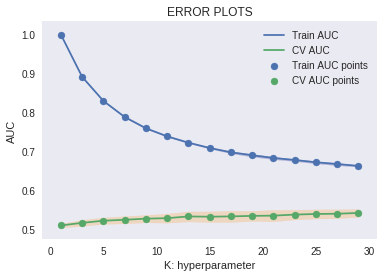

In [0]:
#Plotting using GridSearchCV

train_auc= grid_search.cv_results_['mean_train_score']
train_auc_std= grid_search.cv_results_['std_train_score']
cv_auc =grid_search.cv_results_['mean_test_score'] 
cv_auc_std= grid_search.cv_results_['std_test_score']

plt.plot(parameters['n_neighbors'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


#### After finding the best hyper parameter, we are training our model-M using the best hyper-param.And, finding the AUC on test data and plotting the ROC curve on both train and test using model-M.

In [0]:
#here best hyper parameter is K(29)
best_k=29


### Finding the AUC on test data and plotting the ROC curve on both train and test using model-M.

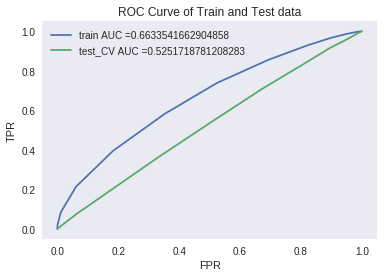

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

neigh = KNeighborsClassifier(n_neighbors=best_k,algorithm='brute')
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

#y_train_pred = batch_predict(neigh, X_tr)    
#y_test_pred = batch_predict(neigh, X_te)
y_train_pred = neigh.predict_proba(X_tr)[:,1]
y_test_pred = neigh.predict_proba(X_te)[:,1]


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test_CV AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve of Train and Test data")
plt.grid()
plt.show()



### Confusion matrix with predicted and original labels of test data points


#### Confusion matrix of Train data

the maximum value of tpr*(1-fpr) 0.37688530169600776 for threshold 0.862


Text(0.5, 24.0, 'Predicted label')

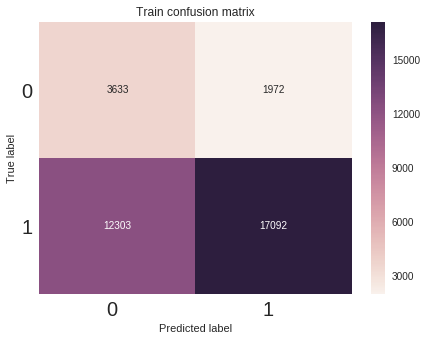

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

fig = plt.figure(figsize=(7,5))
cm_train=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
heatmap = sns.heatmap(cm_train, annot=True, fmt="d")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title("Train confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')

#### Confusion matrix of Test data


the maximum value of tpr*(1-fpr) 0.266839468987782 for threshold 0.862


Text(0.5, 24.0, 'Predicted label')

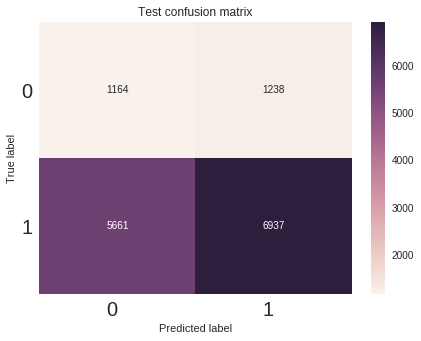

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

cm_test=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
fig = plt.figure(figsize=(7,5))
heatmap = sns.heatmap(cm_test, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title('Test confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

<h2>2.5 Feature selection with `SelectKBest` </h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
from sklearn.feature_selection import SelectKBest, chi2

In [0]:
#Here I'm taking set2 to SelectKBest

print("Train=",set_2_X_tr.shape,y_train.shape)
print("Test",set_2_X_te.shape,y_test.shape)

Train= (35000, 8685) (35000,)
Test (15000, 8685) (15000,)


In [0]:
#Selecting top 2000 features 
X_new_train = SelectKBest(chi2, k=2000).fit_transform(set_2_X_tr, y_train)

In [0]:
#Selecting top 2000 features
X_new_test=SelectKBest(chi2,k=2000).fit_transform(set_2_X_te,y_test)

In [0]:
#After selecting top 2000 featutes 
print(X_new_train.shape,y_train.shape)
print(X_new_test.shape,y_test.shape)

(35000, 2000) (35000,)
(15000, 2000) (15000,)


### Applying KNN

In [0]:
#Brute Force
from sklearn.neighbors import KNeighborsClassifier

### 1. Find the best hyper parameter which results in the maximum AUC value

### Find the best hyper paramter using k-fold cross validation (or) simple cross validation data



#### 2. K-fold cross validation

In [0]:
#https://github.com/justmarkham/scikit-learn-videos/blob/master/07_cross_validation.ipynb
#Importing library from sklearn
from sklearn.model_selection import cross_val_score


In [0]:
#Searching optimal value of k in KNN

K_score=[] # creating list that stores average scores for each k value 

for k in K_range:
    neigh=KNeighborsClassifier(n_neighbors=k,algorithm='brute') # passing values of k in this classifier
    scores=cross_val_score(neigh,X_new_train,y_train,cv=5,scoring='roc_auc') #storing the values of accuracy in scores list
    print(scores.mean())
    K_score.append(scores.mean()) # appending the mean score of each value of K



0.5059156261441904
0.5178535645781966
0.5186223239128551
0.5167649137171435
0.5167589352871369
0.5147323689043344
0.5214031587657061
0.5238356969627906
0.5250716235640578
0.5288264114291801
0.5299472911870202
0.5292450229190852
0.5298911485702069
0.5287456419293699
0.5295970067791451


In [0]:
#Printing the average value of score for each value of k
print(K_score)


[0.5059156261441904, 0.5178535645781966, 0.5186223239128551, 0.5167649137171435, 0.5167589352871369, 0.5147323689043344, 0.5214031587657061, 0.5238356969627906, 0.5250716235640578, 0.5288264114291801, 0.5299472911870202, 0.5292450229190852, 0.5298911485702069, 0.5287456419293699, 0.5295970067791451]


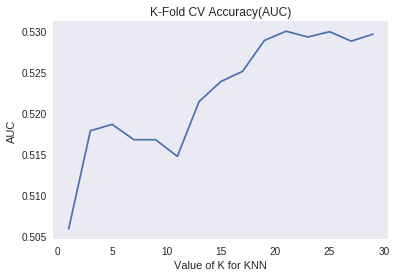

In [0]:
# Plot between different values of K and average score for each value of K 

%matplotlib inline

plt.plot(K_range,K_score)
plt.xlabel("Value of K for KNN")
plt.ylabel("AUC")
plt.title("K-Fold CV Accuracy(AUC)")
plt.grid()


#### Here we can see that the accuracy increases when the value of K increases the optimal value of K is 28.Where we are getting maximum value of accuracy.

### 3. GridSearchCV


In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
neigh = KNeighborsClassifier(algorithm='brute')
parameters = {'n_neighbors':K_range}

In [0]:
grid_search = GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc',n_jobs=-1,verbose=10)
grid_search.fit(X_new_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 48.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 57.0min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 63.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [0]:
from sklearn.externals import joblib
joblib.dump(grid_search,'grid_search_joblib_m_selecttop_2000')

['grid_search_joblib_m_selecttop_2000']

In [0]:
# examine the best model
print("Best Score=",grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

Best Score= 0.5305014036412887
{'n_neighbors': 29}
KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=29, p=2,
           weights='uniform')


### Representation of results


#### Plotting the performance of model both on train data and cross validation data for each hyper parameter:


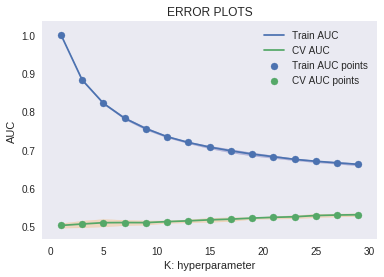

In [0]:
#Plotting using GridSearchCV

train_auc= grid_search.cv_results_['mean_train_score']
train_auc_std= grid_search.cv_results_['std_train_score']
cv_auc =grid_search.cv_results_['mean_test_score'] 
cv_auc_std= grid_search.cv_results_['std_test_score']

plt.plot(parameters['n_neighbors'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()



#### After finding the best hyper parameter, we are training our model-M using the best hyper-param.And, finding the AUC on test data and plotting the ROC curve on both train and test using model-M.


In [0]:
#here best hyper parameter is K(21)
best_k=29


### Finding the AUC on test data and plotting the ROC curve on both train and test using model-M.

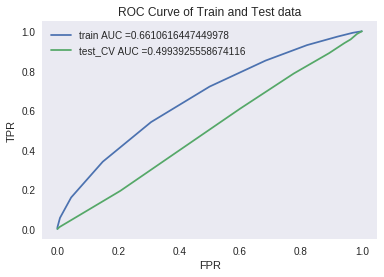

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

neigh = KNeighborsClassifier(n_neighbors=best_k,algorithm='brute')
neigh.fit(X_new_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.predict_proba(X_new_train)[:,1]    
y_test_pred = neigh.predict_proba(X_new_test)[:,1]



train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test_CV AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve of Train and Test data")
plt.grid()
plt.show()


### Confusion matrix with predicted and original labels of test data points



#### Confusion matrix of Train data

the maximum value of tpr*(1-fpr) 0.3741810423377543 for threshold 0.862


Text(0.5, 24.0, 'Predicted label')

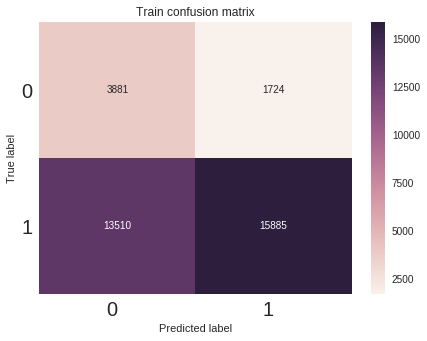

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

fig = plt.figure(figsize=(7,5))
cm_train=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
heatmap = sns.heatmap(cm_train, annot=True, fmt="d")
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title("Train confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')


#### Confusion matrix of Test data

the maximum value of tpr*(1-fpr) 0.24326383567485374 for threshold 0.862


Text(0.5, 24.0, 'Predicted label')

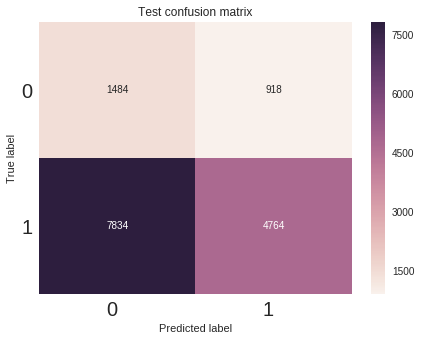

In [0]:
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

cm_test=confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
fig = plt.figure(figsize=(7,5))
heatmap = sns.heatmap(cm_test, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.title('Test confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

<h1>3. Conclusions</h1>

In [0]:
# Please compare all your models using Prettytable library

In [0]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
print("\n Before selecting Top 2000 features \n")
x.field_names = ["Vectorizer", "Model", "Hyper parameter(Grid Search)","AUC(TEST AUC)"]
x.add_row([("BOW"),("Brute"),(29),(0.58)])
x.add_row([('TFIDF'),("Brute"),(29),(0.55)])
x.add_row([('AVG W2V'),("Brute"),(29),(0.57)])
x.add_row([('TFIDF W2V'),("Brute"),(29),(0.52)])

print(x)


 Before selecting Top 2000 features 

+------------+-------+------------------------------+---------------+
| Vectorizer | Model | Hyper parameter(Grid Search) | AUC(TEST AUC) |
+------------+-------+------------------------------+---------------+
|    BOW     | Brute |              29              |      0.58     |
|   TFIDF    | Brute |              29              |      0.55     |
|  AVG W2V   | Brute |              29              |      0.57     |
| TFIDF W2V  | Brute |              29              |      0.52     |
+------------+-------+------------------------------+---------------+


In [0]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
print("\n After selecting Top 2000 features \n")
x.field_names = ["Vectorizer", "Model", "Hyper parameter","AUC"]

x.add_row([('TFIDF'),("Brute"),(29),(0.49)])

print(x)


 After selecting Top 2000 features 

+------------+-------+-----------------+------+
| Vectorizer | Model | Hyper parameter | AUC  |
+------------+-------+-----------------+------+
|   TFIDF    | Brute |        29       | 0.49 |
+------------+-------+-----------------+------+


### Elaborating each steps:

1) For this Assignment I'm using only 50,000 data points.

2) There are two dataframes such as project_data and resources_data.

3) Merging all the features of resource_data into project_data by creating new columns. 
    ex- data_quantity=resource_data['quantity'],
        project_data['quantity']=data_quantity,
         in this way.

4) Splitting the data into two parts such as train,test.

5) Encording all the categorical,numerical features by take caring of data leakage.

6) Encording Essay and project_title using (BOW,TFIDF,AVGW2V,TFIDF W2V)

7) Concatenating all the categorical,numerical,(BOW,TFIDF,AVGW2V,TFIDF W2V) features.

8)Applying KNN:-
    
    (i) Finding best hyperparameter which results in the maximun AUC.
              
           
    (ii) Here I'm using K-fold cross validation for finding optimal value of K in KNN. 
        
        -Here also I'm using Sklearn library to do so.
        -Taking same K (odd value range) which is K(1 to 31).
        -I'm doing 5-fold cv=5 for fast computation.
        -Passing only traing data.
        -Scoring=roc_auc for calculating scoring. we can do other scoring matrix too but here I'm taking auc under consideration.
        -Taking mean of all the score and plotting a plot b/w K-heparameter and average score.
    
    (iii)Here I'm using GridSearchCV for finding optimal value of K in KNN.
    
        -Here I'm passing on X_tr(train) data.
        - CV value is 5 that I'm passing.
        - Accuracy matrix is roc_auc
        - It gives best parameters and best n_neighbors value.

9) Representation of result: 
    
    -Plotting a plot using gridsearchcv between train and cv then finding optimal k by the help of plot.

10) After finding the optimal k-hyperparameter:
    
    -Trained the model using best hyperparameter.
    -Plotting roc_curve for both train and test data.

11) Making confusion matrix for train and test data.

12)At last we make prettytable to summarized the results.

    - In this for hyperparamter I'm considering GridSearchCV (grid_search.best_params_) this function value.
    - For AUC I'm taking Test AUC for each SET such as (BOW,TFIDF,AVGW2V,TFIDF W2V).
    
